In [80]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [82]:
#Стандартизация
data = pd.read_table('Путь к файлу')
scaler = StandardScaler()
scaler.fit(data.drop('class', axis=1))
scaled_features = scaler.transform(data.drop('class', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('class', axis=1).columns)
X = []
d = []
for i in range(0,len(scaled_data['x2'])):
    d.append(scaled_data['x1'][i])
    d.append(scaled_data['x2'][i])
    X.append(d)
    d = []
X = np.array(X)

In [83]:
data

x1       x2  class
0     25.0514   5.7475      1
1     26.6614   7.3414      1
2     25.2653   6.2466      1
3     25.2285   4.7447      1
4     25.7529   5.1564      1
...       ...      ...    ...
3095   5.1380  16.6150     31
3096   5.7360  16.9991     31
3097   5.2760  17.2475     31
3098   6.4444  16.2033     31
3099   7.1620  18.1836     31

[3100 rows x 3 columns]

In [84]:
X

array([[ 1.13478127, -1.68619662],
       [ 1.35459927, -1.4500282 ],
       [ 1.16398566, -1.61224489],
       ...,
       [-1.56521186,  0.01776018],
       [-1.40568679, -0.1369591 ],
       [-1.30771077,  0.15646226]])

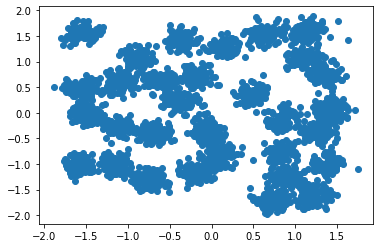

In [86]:
#~31 кластер
plt.scatter(scaled_data['x1'],scaled_data['x2'], label='True Position')

In [87]:
#Обучение модели
kmeans = KMeans(n_clusters=32) 
kmeans.fit(X)

KMeans(n_clusters=32)

[ 7  7  7 ... 27 27 27]


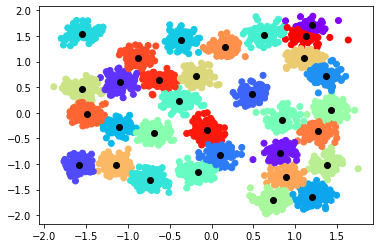

In [88]:
#Вмзуализация кластеров и их центров
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print(kmeans.labels_)

In [89]:
#Метод локтя
distortions = []
istortions = []
inertias = []
q1 = {}
q2 = {}
K = range(1, 50)
for k in K:
    #модель
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    q1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    q2[k] = kmeanModel.inertia_


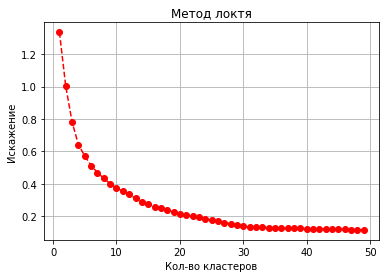

'\nитоговое кол-во кластеров по методу локтя составляет приблизительно 32)\n'

In [90]:
#Визуализация 
plt.plot(K, distortions, 'ro--')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя')
plt.grid(True)
plt.show()

'''
итоговое кол-во кластеров по методу локтя составляет приблизительно 32)
'''

In [91]:
#кластерные силуэты
range_n_clusters = list (range(2,50))
clast_ = []
score_ = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    clast_.append(n_clusters)
    score_.append(score)
    print("Кол-во кластеров = {}, индекс силуэта {}".format(n_clusters, score))
'''
исходя из графика, оптимальное количество кластеров составляет 31
'''

Кол-во кластеров = 2, индекс силуэта 0.3783550499518461
Кол-во кластеров = 3, индекс силуэта 0.4154821007323508
Кол-во кластеров = 4, индекс силуэта 0.42906120653241636
Кол-во кластеров = 5, индекс силуэта 0.4183553513767777
Кол-во кластеров = 6, индекс силуэта 0.42476517483287424
Кол-во кластеров = 7, индекс силуэта 0.42121475303484174
Кол-во кластеров = 8, индекс силуэта 0.4336842838899511
Кол-во кластеров = 9, индекс силуэта 0.4527059516727455
Кол-во кластеров = 10, индекс силуэта 0.45889468131374755
Кол-во кластеров = 11, индекс силуэта 0.4584531630347265
Кол-во кластеров = 12, индекс силуэта 0.4609105391664493
Кол-во кластеров = 13, индекс силуэта 0.4591987249450813
Кол-во кластеров = 14, индекс силуэта 0.47341090117532486
Кол-во кластеров = 15, индекс силуэта 0.4855377758187493
Кол-во кластеров = 16, индекс силуэта 0.488466189169336
Кол-во кластеров = 17, индекс силуэта 0.48390534084329917
Кол-во кластеров = 18, индекс силуэта 0.49550442060684347
Кол-во кластеров = 19, индекс сил

'\nисходя из графика, оптимальное количество кластеров составляет 31\n'

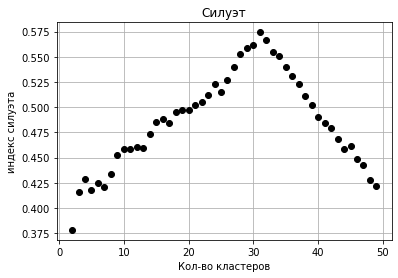

In [92]:
plt.plot(clast_, score_, 'ko')
plt.xlabel('Кол-во кластеров')
plt.ylabel('индекс силуэта')
plt.title('Силуэт')
plt.grid(True)
plt.show()